# **Indian Startup Funding Analysis-Exploratory Data Analysis**

- **Loading And First Look**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

- Load The Dataset

In [23]:
df=pd.read_csv("https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Indian%20Unicorn%20startups%202023%20updated.csv")


- Basic Dataset Information

In [24]:
df.shape

(102, 8)

In [25]:
df.columns.tolist()

['No.',
 'Company',
 'Sector',
 'Entry Valuation^^ ($B)',
 'Valuation ($B)',
 'Entry',
 'Location',
 'Select Investors']

In [26]:
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank"
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent"
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic"
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof..."
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber..."


- Data Quality Assessment

- Check Data types and missing values

In [27]:
df.dtypes

,0
No.,int64
Company,object
Sector,object
Entry Valuation^^ ($B),float64
Valuation ($B),float64
Entry,object
Location,object
Select Investors,object


In [28]:
df.isnull().sum()

,0
No.,0
Company,0
Sector,0
Entry Valuation^^ ($B),0
Valuation ($B),0
Entry,0
Location,0
Select Investors,0


- Check for duplicates

In [29]:
df.duplicated().sum()

np.int64(0)

- Basic Staistics

In [30]:
df.describe()

,No.,Entry Valuation^^ ($B),Valuation ($B)
count,102.000000,102.000000,102.000000
mean,51.500000,1.547549,3.398020
std,29.588849,1.138013,4.710657
min,1.000000,1.000000,0.568000
25%,26.250000,1.000000,1.200000
50%,51.500000,1.200000,1.850000
75%,76.750000,1.582500,3.475000
max,102.000000,10.000000,37.600000


**Key Insights to Discuss:**

- Dataset containes 102 Indian Unicorn Startup
- No Missing Values(Clean Dataset)
- Mix of Categorial and Numerical Data
- Entry Data Span from 2011 to 2012

**Data Preprocessing**

- Clean columns names

In [31]:
df.columns=df.columns.str.strip()

- Convert Entry Columns to Datetime

In [32]:
df['Entry_Date']=pd.to_datetime(df['Entry'],format='%b/%Y')
df['Entry_Year']=df['Entry_Date'].dt.year
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015


In [33]:
df.dtypes

,0
No.,int64
Company,object
Sector,object
Entry Valuation^^ ($B),float64
Valuation ($B),float64
Entry,object
Location,object
Select Investors,object
Entry_Date,datetime64[ns]
Entry_Year,int32


- Create Valuation growth metric

In [34]:
df['Valuation_Growth']=df['Valuation ($B)']/df['Entry Valuation^^ ($B)']
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,Valuation_Growth
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765


- Extract Primary City(before '/')

In [35]:
df['Primary_City']=df['Location'].str.split('/').str[0]
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,Valuation_Growth,Primary_City
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000,Bangalore
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000,Bangalore
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000,Bangalore
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333,Delhi
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765,Noida


- Count numbers of Investors

In [36]:
df['Investor_Count']=df['Select Investors'].str.count(',')+1
df.head()

,No.,Company,Sector,Entry Valuation^^ ($B),Valuation ($B),Entry,Location,Select Investors,Entry_Date,Entry_Year,Valuation_Growth,Primary_City,Investor_Count
0,1,InMobi,Adtech - Mobile Ads,1.0,1.0,Sep/2011,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2011-09-01,2011,1.000000,Bangalore,3
1,2,Flipkart^,E-Commerce,1.0,37.6,Feb/2012,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012-02-01,2012,37.600000,Bangalore,5
2,3,Mu Sigma,SaaS - Analytics,1.0,1.5,Feb/2013,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2013-02-01,2013,1.500000,Bangalore,3
3,4,Snapdeal*,E-Commerce,1.8,2.4,Oct/2014,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014-10-01,2014,1.333333,Delhi,5
4,5,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Feb/2015,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015-02-01,2015,9.411765,Noida,4


# **Univariate Analysis**

- Valuation Distribution Analysis

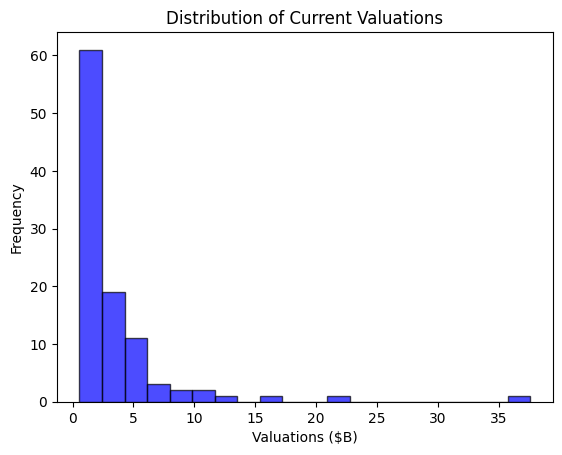

In [39]:
plt.hist(df['Valuation ($B)'],bins=20,alpha=0.7,color='blue',edgecolor='black')
plt.title('Distribution of Current Valuations')
plt.xlabel('Valuations ($B)')
plt.ylabel('Frequency')
plt.show()

# Sector Analysis

- Sector Distribution

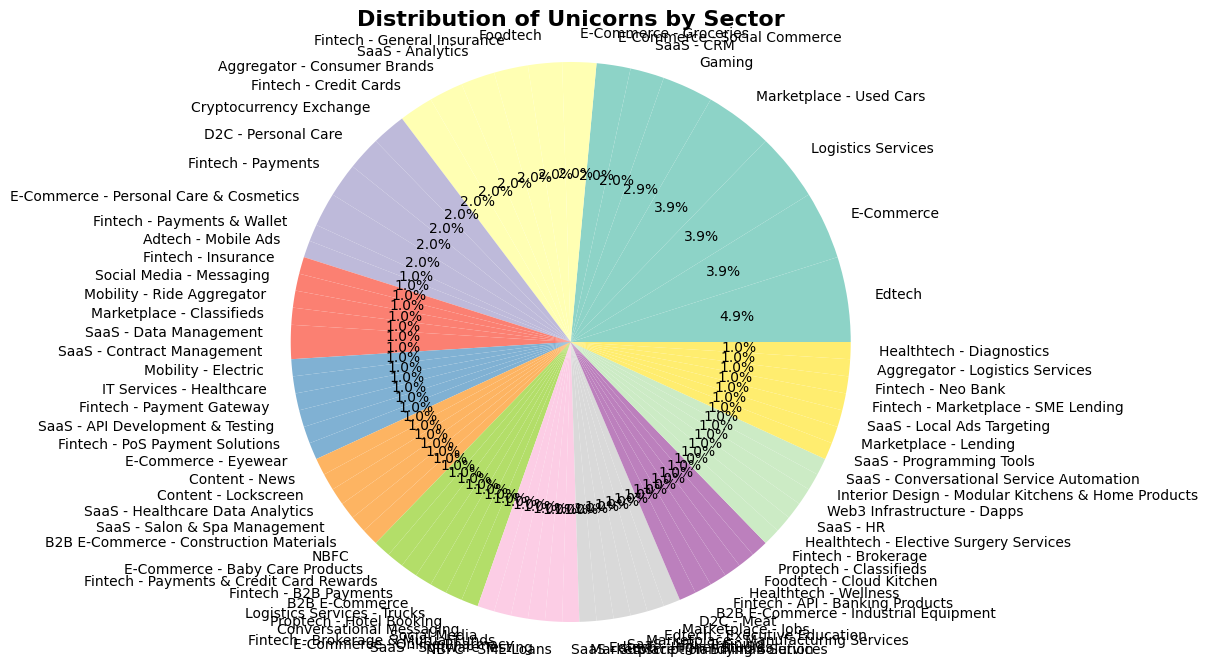

In [45]:
plt.figure(figsize=(12,8))

sector_counts=df['Sector'].value_counts()
colors=plt.cm.Set3(np.linspace(0,1,len(sector_counts)))

plt.pie(sector_counts.values,labels=sector_counts.index,colors=colors,autopct='%1.1f%%',startangle=0)
plt.title('Distribution of Unicorns by Sector', fontsize=16,fontweight='bold')
plt.axis('equal')
plt.show()

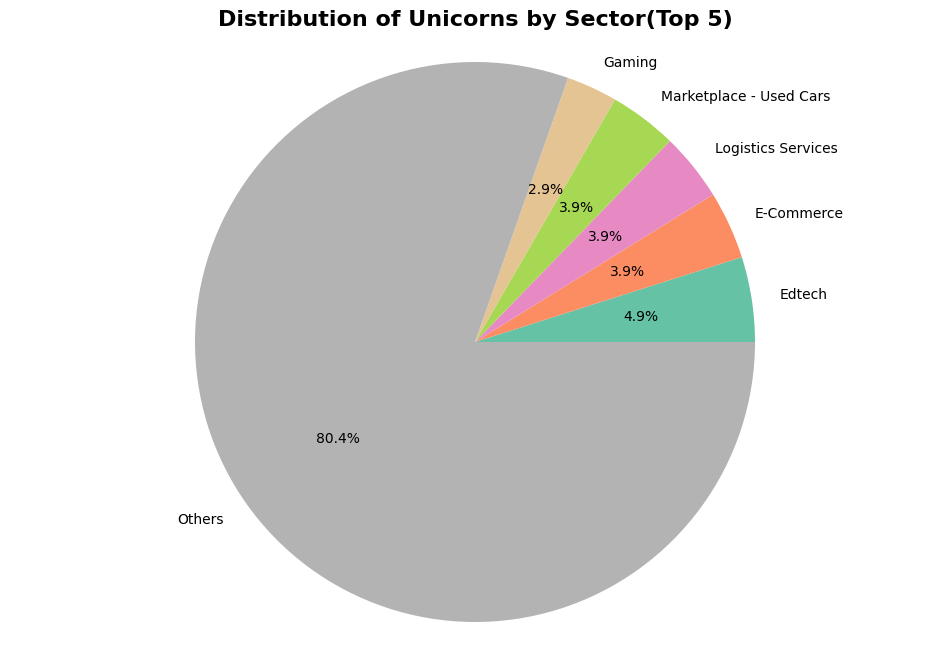

In [61]:
def display_top_k_sector(df,k):
  sector_counts=df['Sector'].value_counts()

  #Select top k Sectors and group the rest as 'others'
  if k<len(sector_counts):
    top_sectors=sector_counts.head(k)
    other_sector_count=sector_counts[k:].sum()
    top_sectors['Others']=other_sector_count
  else:
    top_sectors=sector_counts

  plt.figure(figsize=(12,8))
  colors=plt.cm.Set2(np.linspace(0,1,len(top_sectors)))

  plt.pie(top_sectors.values,labels=top_sectors.index,colors=colors,autopct='%1.1f%%',startangle=0)
  plt.title(f'Distribution of Unicorns by Sector(Top {k})',fontsize=16,fontweight='bold')
  plt.axis('equal')
  plt.show()

#Call the function with k=5 to display 5 Sectors
display_top_k_sector(df,5)

- Top Selectors bar chart

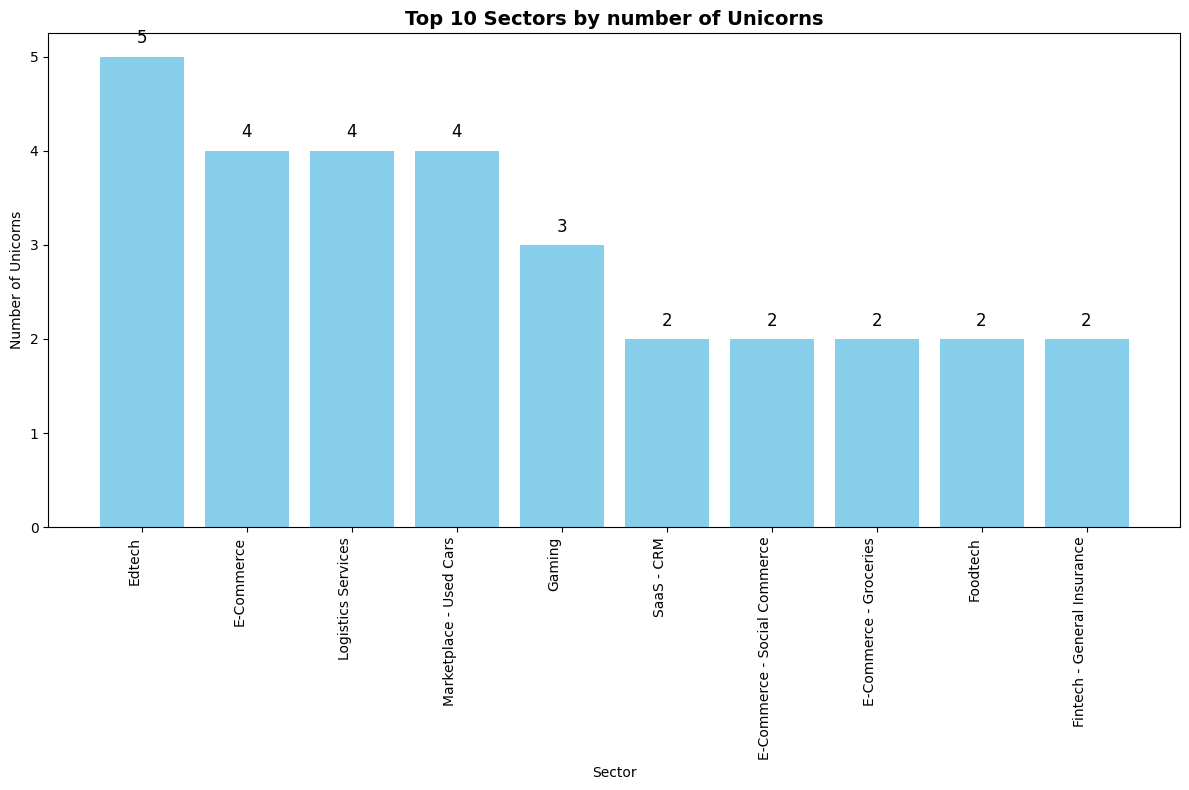

In [65]:
plt.figure(figsize=(12,8))
top_sectors=sector_counts.head(10)
bars=plt.bar(range(len(top_sectors)),top_sectors.values,color='skyblue')
plt.title('Top 10 Sectors by number of Unicorns',fontsize=14,fontweight='bold')
plt.xlabel("Sector")
plt.ylabel("Number of Unicorns")
plt.xticks(range(len(top_sectors)),top_sectors.index,rotation=90,ha='right')

#Add value labels on bars
for bar,value in zip(bars,top_sectors.values):
  plt.text(bar.get_x()+bar.get_width()/2,bar.get_height() +0.1,str(value),ha='center',va='bottom',fontsize=12)

plt.tight_layout()
plt.show()

**Key Insights:**
- EdTech leads with highest number of unicorns
- E-Commerce and Saas are major contriibutors
- edtech emergence as significant sector
- Diversification across multiple sector

# Geographic Distribution

- City-Wise distribution

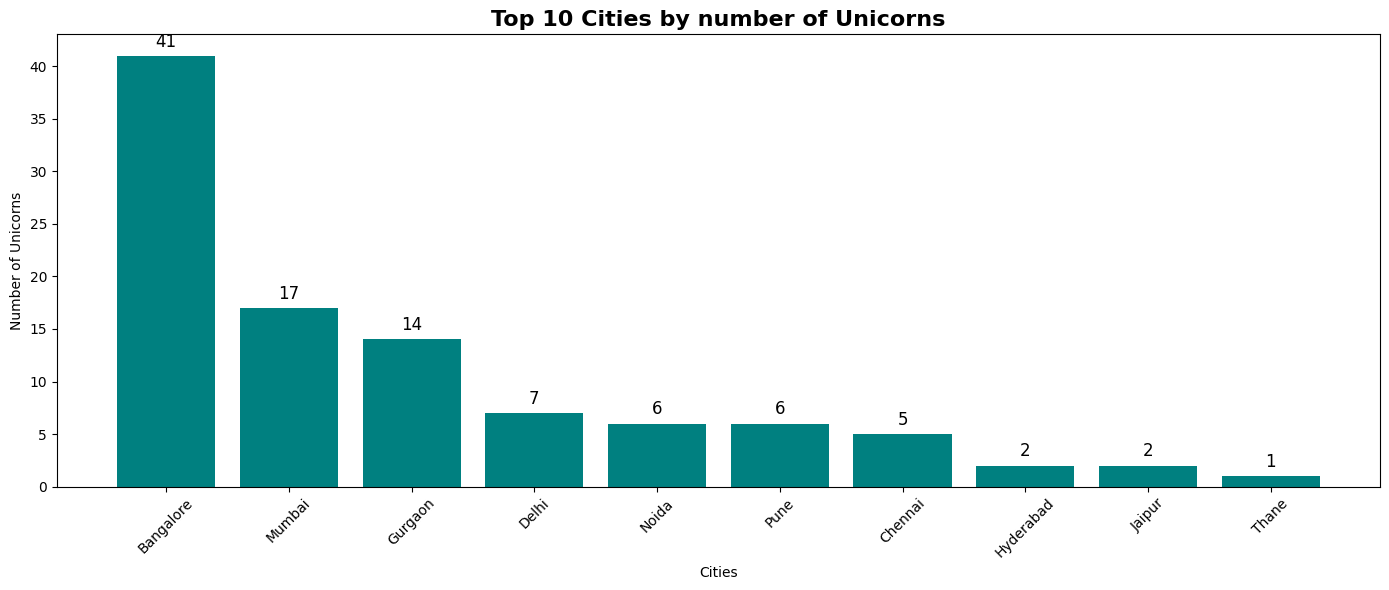

In [68]:
plt.figure(figsize=(14,6))

city_counts=df['Primary_City'].value_counts().head(10)
bars=plt.bar(city_counts.index,city_counts.values,color='teal')
plt.title('Top 10 Cities by number of Unicorns',fontsize=16,fontweight='bold')
plt.xlabel('Cities')
plt.ylabel('Number of Unicorns')
plt.xticks(rotation=45)

#Add value labels
for bar,value in zip(bars,city_counts.values):
  plt.text(bar.get_x()+bar.get_width()/2,bar.get_height()+0.5,str(value),ha='center',va='bottom',fontsize=12)

plt.tight_layout()
plt.show()

- Create a summary Table

In [69]:
city_summary=df.groupby('Primary_City').agg({'Valuation ($B)':['count','sem','mean'],
                                             'Entry_Year':['min','max']}).round(2)

city_summary.columns=['Count','Total_Valuation','Avg_Valuation','First Entry','Last Entry']
city_summary.head()

,Count,Total_Valuation,Avg_Valuation,First Entry,Last Entry
Primary_City,,,,,
Bangalore,41,1.05,4.52,2011,2022
Chennai,5,0.48,2.44,2018,2022
Delhi,7,0.45,2.22,2014,2022
Goa,1,NaN,1.53,2022,2022
Gurgaon,14,0.67,2.71,2015,2022


Key Insights:
- Banglore Dominates with highest number of unicorns
- Mumbai and Gurgaon are other major hubs
- Geographic concentration in tech cities
- Bangalore leads in both count and total valuation

**Tempor Analysis**
- Entry Year Trends

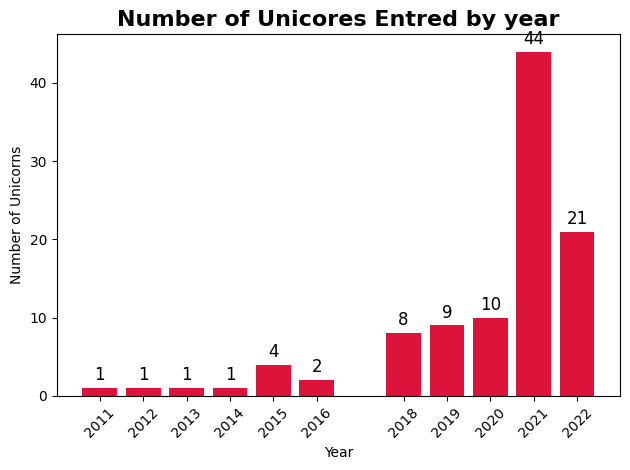

In [80]:
yearly_entries=df['Entry_Year'].value_counts().sort_index()
bars=plt.bar(yearly_entries.index,yearly_entries.values,color='crimson')
plt.title('Number of Unicores Entred by year',fontsize=16,fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Unicorns')
plt.xticks(yearly_entries.index,rotation=45)

#Add value labels
for bar,value in zip(bars,yearly_entries.values):
  plt.text(bar.get_x()+bar.get_width()/2,bar.get_height()+0.5,str(value),ha='center',va='bottom',fontsize=12)

plt.tight_layout()
plt.show()

- Cumulative unicorns

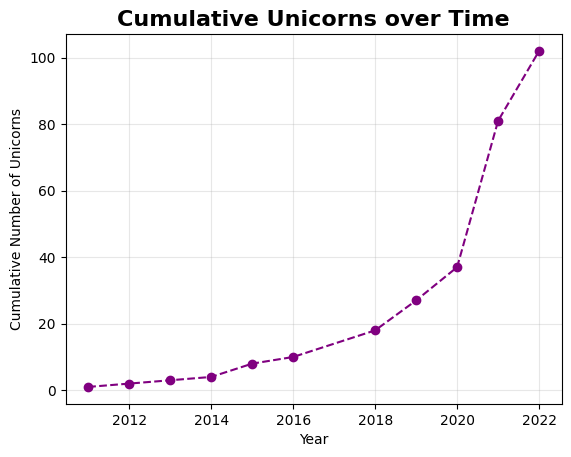

In [81]:
cumulative=yearly_entries.cumsum()
plt.plot(cumulative.index,cumulative.values,marker='o',linestyle='--',color='purple')
plt.title('Cumulative Unicorns over Time',fontsize=16,fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Cumulative Number of Unicorns')
plt.grid(True,alpha=0.3)
plt.show()

- Average Valuation by Year

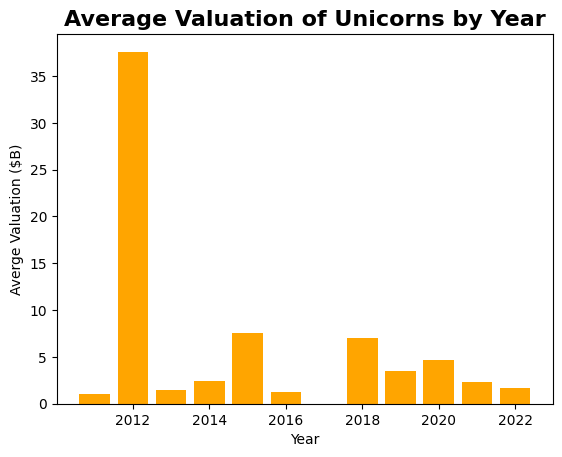

In [82]:
avg_val_by_year=df.groupby('Entry_Year')['Valuation ($B)'].mean()
plt.bar(avg_val_by_year.index,avg_val_by_year.values,color='orange')
plt.title('Average Valuation of Unicorns by Year',fontsize=16,fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Averge Valuation ($B)')
plt.show()

- Sector evolution over time

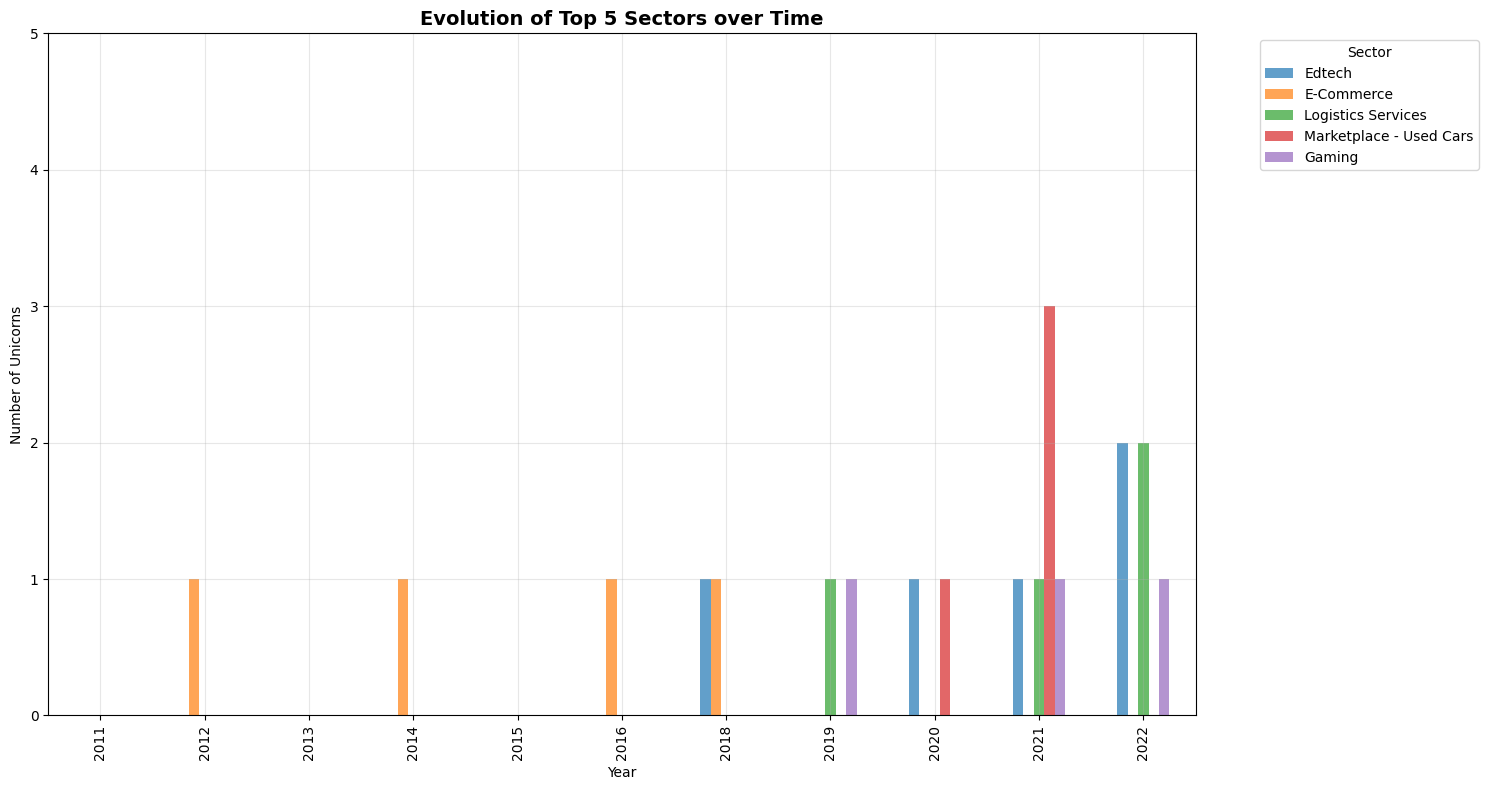

In [89]:
def display_k_sector_evolution(df,k):
  #Group by year and sector,count occurrences
  sector_year=df.groupby(['Entry_Year','Sector']).size().unstack(fill_value=0)

  #Select top k sectors based on overall count
  top_k_sectors_names=df['Sector'].value_counts().head(k).index.tolist()

  sector_year=sector_year[top_k_sectors_names]

  plt.figure(figsize=(15,8))
  sector_year.plot(kind='bar',alpha=0.7,ax=plt.gca())

  plt.title(f"Evolution of Top {k} Sectors over Time",fontsize=14,fontweight='bold')
  plt.xlabel('Year')
  plt.ylabel('Number of Unicorns')
  plt.yticks(range(0,sector_year.values.max()+3))
  plt.legend(title='Sector',loc='upper left',bbox_to_anchor=(1.05,1))
  plt.grid(True,alpha=0.3)
  plt.tight_layout()
  plt.show()

#Call the function with k=5 to display top 5 sectors
display_k_sector_evolution(df,5)